<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling10/blob/main/Word2Vec_Doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Векторное представление слов

**Людвиг Витгенштейн**: "Значение слова определяется тем, как его используют".

**Слова-векторы** (word vectors) — это численные представления слов, сохраняющие семантическую связь между ними.

Какое слово из [**собака**, **кошка**, **машина**] не подходит в этом предложении? "Моя ___ любит много есть и спать".

Для вектора ***кошка*** одним из наиболее близких будет слово ***собака***. Векторное представление слова ***машина*** достаточно сильно отличается от вектора ***кошка***. Эта схожесть обусловлена частотой встречаемости двух слов (т.е. [**кошка**, **собака**] или [**кошка**, **машина**]) в одном контексте.

Векторные представления слов используются во многих областях:
* Моделирование языков,
* Чат-боты,
* Машинный перевод,
* Вопросно-ответные системы,
* И многое другое...

Векторы слов лежат в основе многих систем обработки естественного языка (NLP), захлестнувших современный мир (Amazon Alexa, Google translate, Siri и т.д.).




### Word2Vec

**Word2Vec** — одна из самых известных дистрибутивных моделей, использующая нейросеть. Алгоритмы **Word2Vec** используют контекст, чтобы сформировать численные представления слов, поэтому слова, используемые в одном и том же контексте, имеют похожие векторы.

**Word2Vec** состоит из двух двух алгоритмов: **Skip-Gram** и **Continuous Bag-of-Words** (CBOW). **Skip-Gram** предсказывает слово на основании соседнего слова. **CBOW** (или мешок слов) предсказывает слово на основании контекста.

**Как нам создать числовой вектор для каждого слова?**

Как всегда, чтобы обучить модель обрабатывать естественный язык, нужно дать ей большой корпус данных.

Она создаст вектор для каждого слова, основываясь на его дистрибуции.



### Этапы создания модели векторного представления слов

1. Читается корпус и рассчитывается встречаемость каждого слова в корпусе.
2. Массив слов сортируется по частоте и удаляются редкие слова.
3. Строится [дерево Хаффмана](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B4_%D0%A5%D0%B0%D1%84%D1%84%D0%BC%D0%B0%D0%BD%D0%B0) (для кодирования словаря — это значительно снижает вычислительную и временную сложность алгоритма).
4. Из корпуса читается т.н. субпредложение (базовый элемент корпуса — предложение, абзац, статья) и проводится субсэмплирование (процесс изъятия наиболее частотных слов) из анализа.
5. По субпредложению проходим окном (максимальная дистанция между текущим и предсказываемым словом в предложении).
6. Применяется нейросеть прямого распространения с функцией активации иерархический софтмакс и/или негативное сэмплирование.

[Здесь](https://habr.com/ru/articles/446530/) есть очень крутой гайд по векторному представлению слов с картинками.





# Word2Vec

Для того, чтобы рассмотреть на практике, как работают программы с векторными представлениями слов (или эмбеддингами от англ. *embeddings*), мы воспользуемся библиотекой **Gensim** ([здесь](https://pythonru.com/biblioteki/gensim) есть полное руководство по этой библиотеке), которая работает с самой известной дистрибутивной моделью **Word2Vec**, основанной на нейронной сети, которая предсказывает вероятность появления заданного слова в заданном контексте.

### Модель

Модель вначале нужно натренировать на каком-то корпусе текстов.

Для того, чтобы натренировать модель **Word2Vec**, тренировочные данные должны быть представлены в определенном формате, иначе модель просто не сможет их распознать.

Ей нужно дать на вход текстовый файл, в котором каждое предложение начинается с новой строки. В тексте должны **отсутствовать знаки препинания**, он должен быть приведен **к нижнему регистру** и **лемматизирован**. Также он должен быть **размечен по частям речи** (хотя это скорее опционально).

На [этом сайте](http://vectors.nlpl.eu/repository/) можно найти некоторое количество моделей, предобученных на русском, английском и других языках. Для других языков можно использовать [fastText или GloVe](https://proglib.io/p/obzor-chetyreh-populyarnyh-nlp-modeley-2020-04-21).

In [ ]:
pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
import logging
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO, force = True) # нужно, чтобы видеть, что происходит

In [ ]:
with open('geroy-nashego-vremeni.txt', encoding = 'utf-8') as file:
  geroy = file.read()

Вначале приведем данные в нужный вид.

In [ ]:
pip install razdel

In [ ]:
from razdel import sentenize

In [ ]:
sentences_raw = [list(sentence)[2] for sentence in list(sentenize(geroy))]
sentences_raw

['Михаил Юрьевич Лермонтов \nГерой нашего времени\n     \n\n     Во всякой книге предисловие есть первая и вместе с тем последняя вещь; оно или служит объяснением цели сочинения, или оправданием и ответом на критики.',
 'Но обыкновенно читателям дела нет до нравственной цели и до журнальных нападок, и потому они не читают предисловий.',
 'А жаль, что это так, особенно у нас.',
 'Наша публика так еще молода и простодушна, что не понимает басни, если в конце ее не находит нравоучения.',
 'Она не угадывает шутки, не чувствует иронии; она просто дурно воспитана.',
 'Она еще не знает, что в порядочном обществе и в порядочной книге явная брань не может иметь места; что современная образованность изобрела орудие более острое, почти невидимое и тем не менее смертельное, которое, под одеждою лести, наносит неотразимый и верный удар.',
 'Наша публика похожа на провинциала, который, подслушав разговор двух дипломатов, принадлежащих к враждебным дворам, остался бы уверен, что каждый из них обманыв

In [ ]:
pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=6b5c0d4a4c9f3d28b9dc3a8d88846b38c49aae2e4d28b00ea47aa6cf135b2ecf
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=ef39bb6ed156cf69f738dcf8ebea22e30bd31059a4b820868d0967d303c6226f
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [ ]:
from natasha import (
  Segmenter,

  NewsEmbedding,
  NewsMorphTagger,
  NewsSyntaxParser,
  MorphVocab,

  Doc
)

In [ ]:
segmenter = Segmenter() # сегментирует текст, нужно для распознавания именованных сущностей
emb = NewsEmbedding() # преобразует языковые сущности в числовой вектор
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
morph_vocab = MorphVocab()

2024-03-04 07:22:02,468 : INFO : Loading dictionaries from /usr/local/lib/python3.10/dist-packages/pymorphy2_dicts_ru/data
2024-03-04 07:22:02,572 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
list_of_sentences = []
for sentence in sentences_raw:
  doc = Doc(sentence)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)

  sentence_full = ""
  for token in doc.tokens:
    token.lemmatize(morph_vocab)
    if token.pos != "PUNCT" and token.lemma not in stopwords:
      sentence_full += token.lemma + ' '
  sentence_full = sentence_full.strip() + '\n'
  list_of_sentences.append(sentence_full)
#list_of_sentences

In [ ]:
f = open('geroy.txt', 'w')
f.writelines(list_of_sentences)
f.close()

### Теперь приступаем!

Создаем модель из наших данных.

In [ ]:
f = 'geroy.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. **Основные параметры**:

* данные должны быть итерируемым объектом
* size — размер вектора,
* window — размер окна наблюдения,
* min_count — мин. частотность слова в корпусе,
* sg — используемый алгоритм обучения (0 — CBOW (дефолтно), 1 — Skip-gram (лучше подходит для маленьких выборок)),
* sample — порог для downsampling'a высокочастотных слов,
* workers — количество потоков,
* alpha — learning rate,
* iter — количество итераций,
* max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [ ]:
model_geroy = gensim.models.Word2Vec(data, vector_size = 300, window = 5, min_count = 2)

2024-03-04 07:22:34,234 : INFO : collecting all words and their counts
2024-03-04 07:22:34,239 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-04 07:22:34,272 : INFO : collected 5859 word types from a corpus of 23874 raw words and 2840 sentences
2024-03-04 07:22:34,279 : INFO : Creating a fresh vocabulary
2024-03-04 07:22:34,306 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 2839 unique words (48.46% of original 5859, drops 3020)', 'datetime': '2024-03-04T07:22:34.306297', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-03-04 07:22:34,310 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 20854 word corpus (87.35% of original 23874, drops 3020)', 'datetime': '2024-03-04T07:22:34.310122', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.

In [ ]:
model_geroy.init_sims(replace=True)
model_path = "geroy.bin"

model_geroy.wv.save_word2vec_format(model_path, binary = True)

2024-03-04 07:22:34,764 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2024-03-04 07:22:34,774 : INFO : storing 2839x300 projection weights into geroy.bin


Посмотрим на длину получившегося словаря.

In [ ]:
print(len(model_geroy.wv.index_to_key))

2839


In [ ]:
print(sorted([w for w in model_geroy.wv.index_to_key]))

['11-й', '16-й', 'autrement', 'car', 'cher', 'i', 'ii', 'je', 'la', 'les', 'mon', 'ne', 'pas', 'pour', 'serait', 'trop', 'un', 'vie', 'а-га', 'абрек', 'авось', 'ага', 'адъютант', 'азамат', 'азиат', 'азиатский', 'акация', 'александрович', 'алексей', 'аллах', 'аллея', 'амфитеатр', 'ангажировать', 'ангел', 'английский', 'анекдот', 'аристократический', 'аркан', 'армеец', 'армейский', 'армянин', 'аромат', 'архалук', 'аул', 'ах', 'б', 'базар', 'байрон', 'бал', 'балка', 'балкон', 'баловать', 'банк', 'баран', 'барин', 'бархатный', 'барыня', 'барышня', 'батальон', 'батюшка', 'бахрома', 'башка', 'бег', 'бегать', 'беда', 'бедный', 'бедняжка', 'бежать', 'безумие', 'безумный', 'белый', 'берег', 'беречь', 'беречься', 'бес', 'бесконечный', 'беспечный', 'беспокоить', 'беспокоиться', 'беспокойный', 'беспокойство', 'беспощадно', 'бессонница', 'бестия', 'бесчисленный', 'бешенство', 'бешеный', 'бешмет', 'бешт', 'биение', 'билет', 'битва', 'бить', 'биться', 'благодарить', 'благодарность', 'благодарствуйте'

Посмотрим, что она сможет сказать нам интересного!

In [ ]:
model_geroy.wv.most_similar(positive = ["смерть", "любовь"], negative = ["радость"], topn = 5) # пропорция

[('наш', 0.7788568735122681),
 ('любить', 0.7752928137779236),
 ('свой', 0.7737235426902771),
 ('мочь', 0.7735477685928345),
 ('это', 0.7722823619842529)]

In [ ]:
model_geroy.wv.most_similar("судьба", topn = 5) # наиболее близкие к слову

[('несколько', 0.739263653755188),
 ('свой', 0.7390275597572327),
 ('рука', 0.7379516363143921),
 ('который', 0.7368210554122925),
 ('это', 0.7358959913253784)]

In [ ]:
model_geroy.wv.similarity("печорин", "бэла") # схожесть

0.87713945

In [ ]:
model_geroy.wv.similarity("мери", "бэла")

0.6583099

In [ ]:
model_geroy.wv.doesnt_match("смерть грусть слеза улыбка".split()) # найти лишнее

'грусть'

In [ ]:
model_geroy.wv.words_closer_than("печорин", "бэла") # находит слова, которые ближе к первому, чем второе

Мы можем попробовать отобразить векторы на двумерное пространство.

Вначале попробуем сделать это на заднном списке слов.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format("geroy.bin", binary = True) # загружаем из нашей модели векторы

2024-03-04 07:33:38,887 : INFO : loading projection weights from geroy.bin
2024-03-04 07:33:38,969 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (2839, 300) matrix of type float32 from geroy.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-03-04T07:33:38.968979', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}


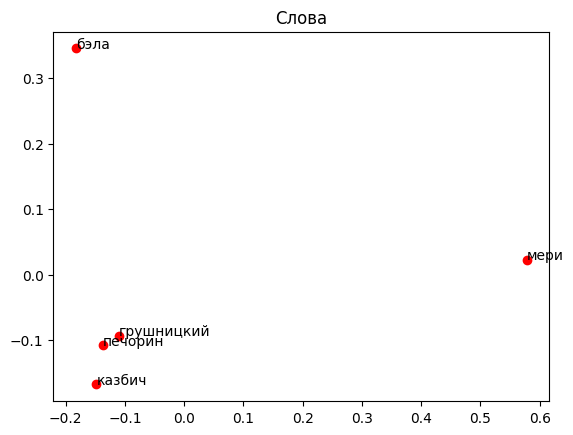

In [ ]:
words = ['бэла', 'печорин', 'казбич', 'грушницкий', 'мери']
X = model[words] # выбираем эти слова из нашей модели

pca = PCA(n_components = 2) # задаём желаемую размерность
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color = 'red')

plt.title('Слова')

for i, word in enumerate(words):
    plt.annotate(word, xy = (coords[i, 0], coords[i, 1]))

plt.show()

Можно попробовать сделать относительно всех слов модели. Тогда расположение слов поменяется.

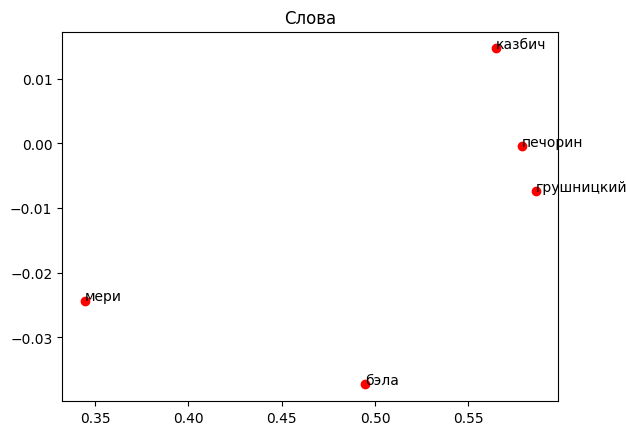

In [ ]:
pca = PCA(n_components = 2)
pca.fit(model[list(model.index_to_key)])
coords = pca.transform(model[words])

plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Слова')

for i, word in enumerate(words):
    plt.annotate(word, xy = (coords[i, 0], coords[i, 1]))

plt.show()

# Doc2Vec

**Doc2Vec** (Document-to-Vector) это способ обработки естественного языка, основывающийся так же, как и Word2Vec, на вектороном представлении слов. Однако Doc2Vec оперирует более большими кусками текста: абзацами, предложениями или даже целыми текстами. Главная идея заключается в том, чтобы создать для каждого "документа" его уникальный вектор.

Для чего может использоваться Doc2Vec?

1. **Document Similarity** (Схожесть)

Можно сравнивать между собой разные документы и оценивать их косинусную близость. Особенно широко используется для рекомендации пользователю определенного контента и обнаружения плагиата.

2. **Document Classification** (Классификация)

Можно классифицировать документы по заранее заданным классам (применяя классификатор после преобразования данных в вектора). Например, это широко используется при обнаружении спама, анализе тональности и категоризации новостных статей.

3. **Recommendation Systems** (Рекомендации)

Можно улучшить рекомендации, сравнивая контент документа с предпочтениями пользователя.

4. **Sentiment Analysis** (Анализ тональности)

Можно использовать при анализе тональности документов, например, отзывов покупателей или постов в соцсетях.

5. **Clustering and Topic Modeling** (Кластеризация по темам)

Можно использовать для кластеризации документов по темам, выделенным на основе близких друг к другу текстов.

6. **Anomaly Detection** (Определение аномалий)

Можно использовать для определения аномалий, то есть таких документов, которые сильно отличаются от "нормального" вектора.

7. **Language Translation** (Перевод)

Можно использовать для выравнивания переводов (и не только), то есть соотнесения по смыслу исходного предложения с предложением на другом языке.

Попробуем натренировать простенькую модель и посмотреть, как она работает!

Для этого вначале надо привести наши данные в правильный вид:

```labeled_data = [
    TaggedDocument(words = ['document', 'text', 'goes', 'here'], tags = [0]),
    TaggedDocument(words = ['another', 'document', 'for', 'classification'], tags = [1])
]```

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt') # для word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
list_of_sentences = []
for sentence in sentences_raw:
  doc = Doc(sentence)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)

  sentence_full = []
  for token in doc.tokens:
    #token.lemmatize(morph_vocab)
    if token.pos != "PUNCT" and token.lemma not in stopwords:
      sentence_full.append(token.text.lower())
  list_of_sentences.append(sentence_full)
list_of_sentences

[['михаил',
  'юрьевич',
  'лермонтов',
  'герой',
  'нашего',
  'времени',
  'во',
  'всякой',
  'книге',
  'предисловие',
  'есть',
  'первая',
  'и',
  'вместе',
  'с',
  'тем',
  'последняя',
  'вещь',
  'оно',
  'или',
  'служит',
  'объяснением',
  'цели',
  'сочинения',
  'или',
  'оправданием',
  'и',
  'ответом',
  'на',
  'критики'],
 ['но',
  'обыкновенно',
  'читателям',
  'дела',
  'нет',
  'до',
  'нравственной',
  'цели',
  'и',
  'до',
  'журнальных',
  'нападок',
  'и',
  'потому',
  'они',
  'не',
  'читают',
  'предисловий'],
 ['а', 'жаль', 'что', 'это', 'так', 'особенно', 'у', 'нас'],
 ['наша',
  'публика',
  'так',
  'еще',
  'молода',
  'и',
  'простодушна',
  'что',
  'не',
  'понимает',
  'басни',
  'если',
  'в',
  'конце',
  'ее',
  'не',
  'находит',
  'нравоучения'],
 ['она',
  'не',
  'угадывает',
  'шутки',
  'не',
  'чувствует',
  'иронии',
  'она',
  'просто',
  'дурно',
  'воспитана'],
 ['она',
  'еще',
  'не',
  'знает',
  'что',
  'в',
  'порядочном',

In [ ]:
tagged_data = [TaggedDocument(sentence, [i]) for i, sentence in enumerate(list_of_sentences)]
tagged_data

[TaggedDocument(words=['михаил', 'юрьевич', 'лермонтов', 'герой', 'нашего', 'времени', 'во', 'всякой', 'книге', 'предисловие', 'есть', 'первая', 'и', 'вместе', 'с', 'тем', 'последняя', 'вещь', 'оно', 'или', 'служит', 'объяснением', 'цели', 'сочинения', 'или', 'оправданием', 'и', 'ответом', 'на', 'критики'], tags=[0]),
 TaggedDocument(words=['но', 'обыкновенно', 'читателям', 'дела', 'нет', 'до', 'нравственной', 'цели', 'и', 'до', 'журнальных', 'нападок', 'и', 'потому', 'они', 'не', 'читают', 'предисловий'], tags=[1]),
 TaggedDocument(words=['а', 'жаль', 'что', 'это', 'так', 'особенно', 'у', 'нас'], tags=[2]),
 TaggedDocument(words=['наша', 'публика', 'так', 'еще', 'молода', 'и', 'простодушна', 'что', 'не', 'понимает', 'басни', 'если', 'в', 'конце', 'ее', 'не', 'находит', 'нравоучения'], tags=[3]),
 TaggedDocument(words=['она', 'не', 'угадывает', 'шутки', 'не', 'чувствует', 'иронии', 'она', 'просто', 'дурно', 'воспитана'], tags=[4]),
 TaggedDocument(words=['она', 'еще', 'не', 'знает', 'ч

In [ ]:
# тренируем
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, workers = 4)
# сохраняем
model.save("test_doc2vec.model")
# загружаем
model = Doc2Vec.load("test_doc2vec.model")

2024-03-04 07:22:48,322 : INFO : collecting all words and their counts
2024-03-04 07:22:48,325 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2024-03-04 07:22:48,350 : INFO : collected 10806 word types and 2892 unique tags from a corpus of 2892 examples and 41533 words
2024-03-04 07:22:48,353 : INFO : Creating a fresh vocabulary
2024-03-04 07:22:48,424 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 10806 unique words (100.00% of original 10806, drops 0)', 'datetime': '2024-03-04T07:22:48.424204', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-03-04 07:22:48,426 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 41533 word corpus (100.00% of original 41533, drops 0)', 'datetime': '2024-03-04T07:22:48.426683', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

In [ ]:
list(enumerate(list_of_sentences))[158]

(158,
 ['сынишка',
  'его',
  'мальчик',
  'лет',
  'пятнадцати',
  'повадился',
  'к',
  'нам',
  'ездит',
  'всякий',
  'день',
  'бывало',
  'то',
  'за',
  'тем',
  'то',
  'за',
  'другим',
  'и',
  'уж',
  'точно',
  'избаловали',
  'мы',
  'его',
  'с',
  'григорием',
  'александровичем'])

In [ ]:
test_doc = word_tokenize("от судьбы не убежишь".lower())
model.docvecs.most_similar(positive = [model.infer_vector(test_doc)], topn = 5)

[(2312, 0.9073140621185303),
 (2261, 0.8963360786437988),
 (232, 0.8927090167999268),
 (158, 0.8910722136497498),
 (1403, 0.8856860399246216)]